## Обзор данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
pd.DataFrame(round(games.isna().mean()*100,)
            ).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,2.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.000000
User_Score,40.000000


Из обзора данных видно, что необходимо привести столбцы к нижнему регистру, для более читаемого вида. Изменить тип данных в столбцах: год релиза и оценки пользователей. Изучить и устранить пропущенные значения в стобцах: названия, года релиза, жанра, оценки критиков, оценки пользователей, возрастного рейтинга, если это необходимо. 

## Предобработка данных

In [5]:
games.columns = games.columns.str.lower()


In [6]:
games['name'].duplicated().sum()


5155

In [7]:
games = games.dropna(subset=['year_of_release'])
games = games.dropna(subset=['name'])
games = games.dropna(subset=['genre'])
#Удаляем пропуски 

In [8]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
games = games.replace('tbd', np.nan)

In [10]:
games['year_of_release'] = games['year_of_release'].astype(int)
#Меняем тип данных на целое число.
games['user_score'] = games['user_score'].astype(float)

In [11]:
games['sum_sales'] =  games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [12]:
games['rating'] = games['rating'].fillna('неизвестно')

In [13]:
games['user_score'] = games['user_score'].astype(float)
games['critic_score'] = games['critic_score'].astype(float)

In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  sum_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Столбцы были приведены к нижнему регистру.

В столбцах: оценка критиков и оценка пользователей, пропусков большое количество, их нельзя удалить, или заполнить, поскольку это может исказить анализ данных. Причиной пропусков может быть, отсутствие значений. Это могут быть неизвестные, неоцененные игры или недавно вышедшие. В оценке пользователей помимо обычных пропусков, были обнаружены значения 'tbd'. Их приравляли к пропускам, поскольку это неизвестное значение.

Пропуски в возрастном рейтинге, также нельзя заполнить точно, но возможно заполнить их значением 'неизвестно'.

Пропуски в столбцах с названием, годом выпуска и жанром, скорее всего связаны с тем, что у игры нет точных данных об этих характеристиках, либо разработчики забыли указать их. У нас нет данных для заполнения этих ячеек и их количество менее 2%, они не повлияют на дальнейший ход исследования, поэтому удаляем.

Имеются дубликаты в столбце с названием, но это связано с тем, что одна и таже игра выходит на разных платформах.


## Проведение иследовательского анализа данных об играх

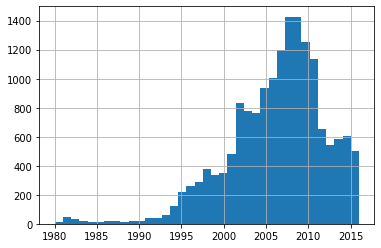

In [15]:
games['year_of_release'].hist(bins=37);


Данные по выпуску игр сильно отличаются, поэтому для нашего прогноза возьмем данные за последние 2 полных года. До 2000 года совсем не значемы, а все остальные после не достаточны актуальны для иследования и могут испортить анализ. 

In [16]:
games.pivot_table(index='platform', values='sum_sales',
                  aggfunc='sum').sort_values(by='sum_sales', ascending=False)

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Text(0, 0.5, 'продажи')

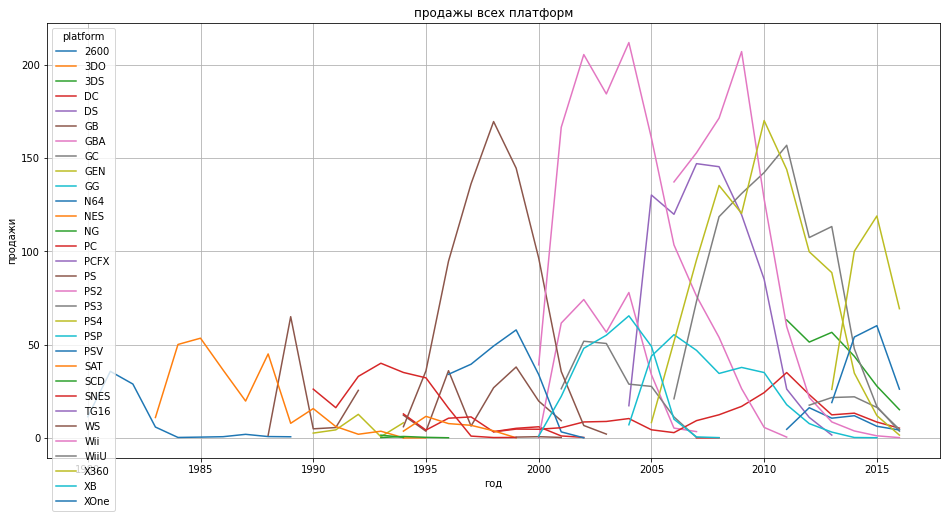

In [17]:
games.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales',
                  aggfunc='sum').plot(grid=True, figsize=(16, 8), title = 'продажы всех платформ')
plt.xlabel('год')
plt.ylabel('продажи')

Из последней сводной таблицы и графика мы можем заметить, что наиболее продаваемые платформы за все время не помогут нам в иследовании. Необходимо выделить самые популярные платформы именно за последние года.

In [18]:
games = games.query('year_of_release >= 2014')
#делаем срез по таблице с нужными годами

In [19]:
top_platforms = games.pivot_table(index='platform', values='sum_sales',
                  aggfunc='sum').sort_values(by='sum_sales',ascending=False)
top_platforms

,sum_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


In [20]:
pl = ['PS4', 'XOne', '3DS', 'WiiU', 'PS3', 'PC', 'X360']
#составляем список из самых продаваемых платформ
games = games.query('@pl == platform')
#делаем срез по таблице с нужными платформами

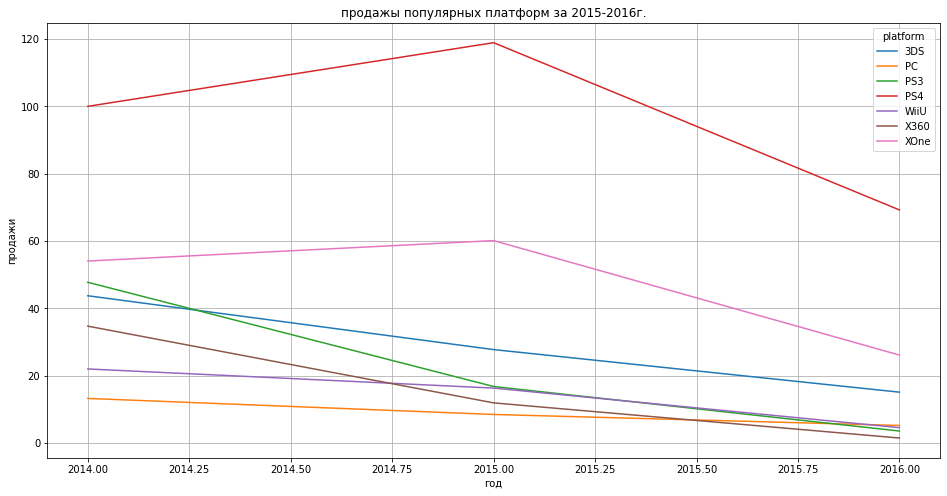

In [21]:
games.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales',
                  aggfunc='sum').plot(grid=True, figsize=(16, 8), title = 'продажы популярных платформ за 2015-2016г.')
plt.xlabel('год')
plt.ylabel('продажи')
plt.show()


Если учитывать, что данные в таблице за 2016 год неполные, в последние годы продажи расли у PS4 и XOne, у всех остальных  платформ падают продажи. Особенно сильно у приставок прошлого покаления PS3 и X360.

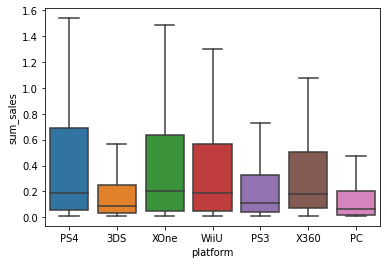

In [22]:
sns.boxplot(x='platform', y='sum_sales', data=games, showfliers = False)
plt.show()


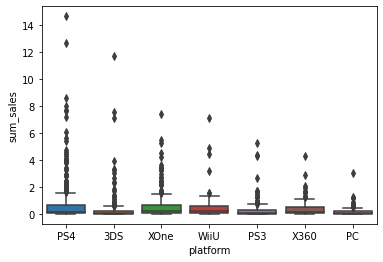

In [23]:
sns.boxplot(x='platform', y='sum_sales', data=games)
plt.show()

Можем наблюдать продажи платформ без выбросов и с ними. Самыми продаваемыми платформами являются PS4, XOne и WiiU. Выбросами в данном случае могут быть аномально успешные проекты. В нашем случае выбросы практически не влияют на общую картину данных.

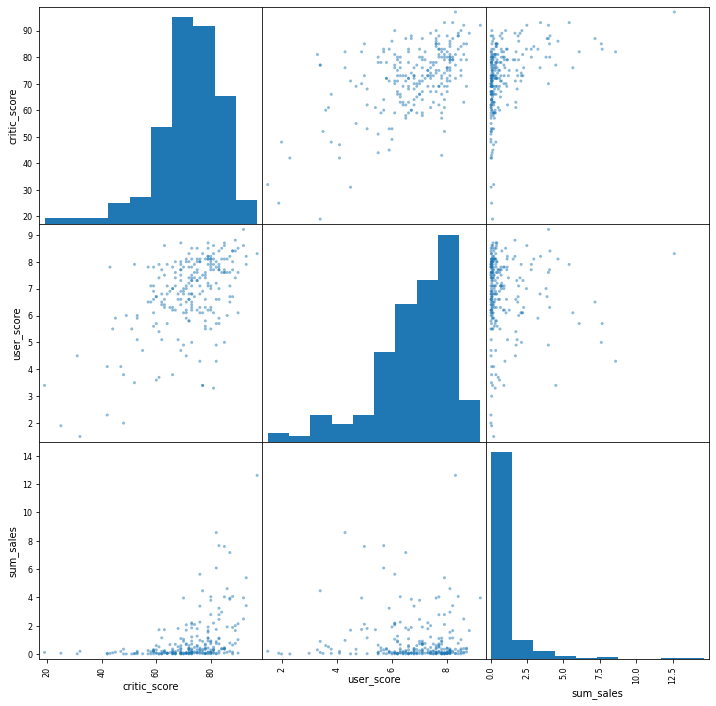

critic_score    0.402661
user_score     -0.040132
sum_sales       1.000000
Name: sum_sales, dtype: float64

In [24]:
games_ps = games.query('platform == "PS4"')

influence_ps = games_ps[['critic_score', 'user_score', 'sum_sales']]
pd.plotting.scatter_matrix(influence_ps, figsize=(12, 12)) 
plt.show()
games_ps[['critic_score', 'user_score', 'sum_sales']].corr()['sum_sales']

Можем заметить, что отзывы критиков влияют на продажи PS4, а отзывы пользователей нет.

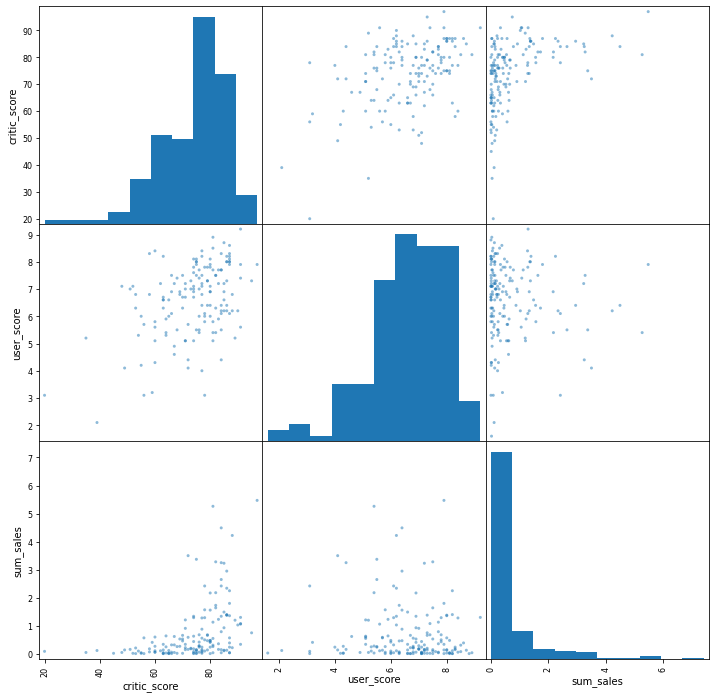

critic_score    0.428677
user_score     -0.070384
sum_sales       1.000000
Name: sum_sales, dtype: float64

In [25]:
games_xone = games.query('platform == "XOne"')

influence_xone = games_xone[['critic_score', 'user_score', 'sum_sales']]
pd.plotting.scatter_matrix(influence_xone, figsize=(12, 12)) 
plt.show()
games_xone[['critic_score', 'user_score', 'sum_sales']].corr()['sum_sales']

Такая же ситуация с XOne.

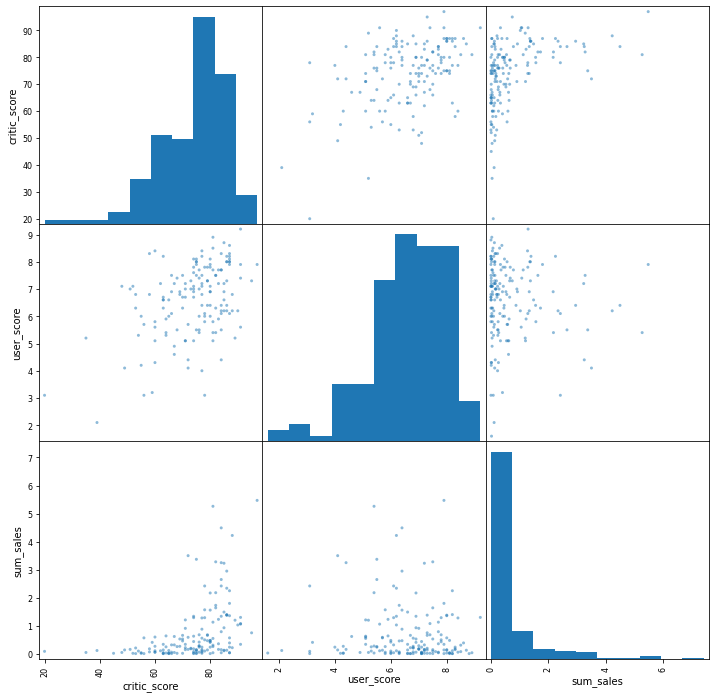

critic_score    0.370201
user_score      0.407926
sum_sales       1.000000
Name: sum_sales, dtype: float64

In [26]:
games_ds = games.query('platform == "WiiU"')

influence_ds = games_ds[['critic_score', 'user_score', 'sum_sales']]
pd.plotting.scatter_matrix(influence_xone, figsize=(12, 12)) 
plt.show()
games_ds[['critic_score', 'user_score', 'sum_sales']].corr()['sum_sales']

Для WiiU оценки пользователи влияют на продажи даже больше, чем критики.

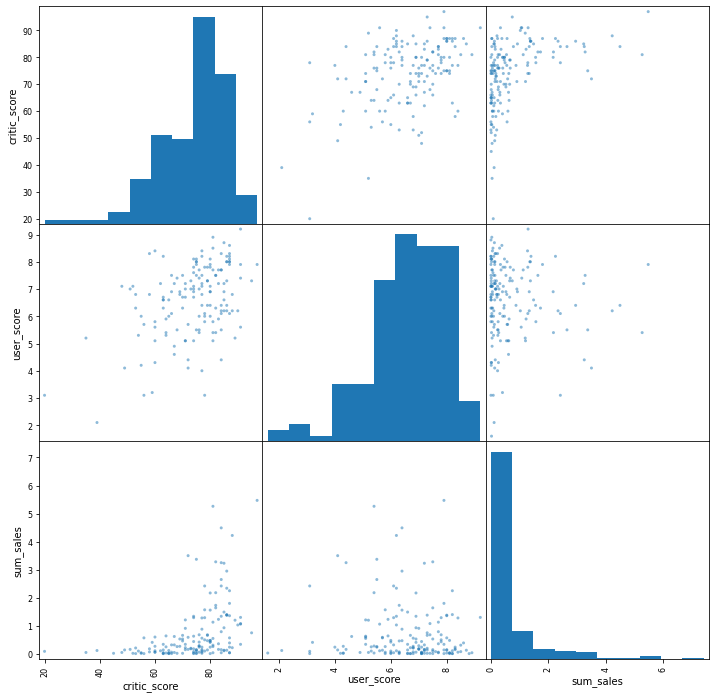

critic_score    0.174634
user_score     -0.071597
sum_sales       1.000000
Name: sum_sales, dtype: float64

In [27]:
games_pc = games.query('platform == "PC"')

influence_pc = games_pc[['critic_score', 'user_score', 'sum_sales']]
pd.plotting.scatter_matrix(influence_xone, figsize=(12, 12)) 
plt.show()
games_pc[['critic_score', 'user_score', 'sum_sales']].corr()['sum_sales']

Для PC и оценки критиков и пользователей, не сильно влияют на продажи.

In [28]:
games.pivot_table(index='genre', values='sum_sales', aggfunc=['count','sum','mean'])

,count,sum,mean
,sum_sales,sum_sales,sum_sales
genre,,,
Action,496,190.50,0.384073
Adventure,106,15.03,0.141792
Fighting,53,27.53,0.519434
Misc,91,30.96,0.340220
Platform,34,17.90,0.526471
Puzzle,12,2.15,0.179167
Racing,66,27.42,0.415455
Role-Playing,162,95.34,0.588519


Из построенного графика, можем заметить, что количество выпущеных игр в разные годы заметно отличается. Наиболее продаваемые платформы за все время не помогут нам в иследовании. Необходимо выделить самые популярные платформы именно за последние года. Поскольку нам необходимо составить прогноз на следующий год, возмем данные за последние два полных года, поскольку данные за 2016 год неполные - это 2014 - 2016 года. Они покажут нам актуальную информацию по платформам и продажам. Характерный срок для появления новых платформ - несколько лет, а старые исчезают примерно за 10 лет. Это связано с быстрым ростом технологий в мире. 

Абсолютный лидер по сумме продаж платформа - PS4, далее идет Xone и 3DS. Средний результат у PS3 и X360. Pc замыкает список интересующих нас платформ. Из этого следует, что большей популярностью пользуются консоли. 

За  последние два года прослеживается тенденция, что продажи расли у PS4 и XOne, у всех остальных  платформ падают продажи. Особенно сильно у приставок прошлого покаления PS3 и X360. Поэтому стоит присмотреться именно к PS4 и XOne.

Отбросив выбросы, можем наблюдать, что самыми продаваемыми платформами являются PS4, XOne и WiiU. Выбросами в данном случае могут быть аномально успешные проекты. В нашем случае выбросы практически не влияют на общую картину данных.

Можем заметить, что у популярных платформ отсутствует влияние оценки пользователей, однако оценки критиков действительно влияют на продажи. Это не удивительно, поскольку частно люди сначала прислушиваются к мнению критиков, а после игра становится популярна среди пользователей. Но у платформ с меньшем количеством продаж картина меняется, поэтому более правильно прогназировать рекламную компанию будет, опираясь на определенную платформу.

Больше всего приносят денег такие жанры как: Шутеры, Экшен, Ролеплей и Спортивные. По средним продажам жанер Шутер, довольно близко к жанру Экшен, хоть и продаж в сумме у него заметно меньше. Самые высокие средние продажы у жанра Шутер. Наиболее часто встречается жанр - Экшен. Поэтому у него большие общие продажы, хотя среднее по продажам невысокое. Самые низкие показатели у Пазл игр и стратегий. Остальные распределены примерно одинаково.


## Составление портрета пользователя

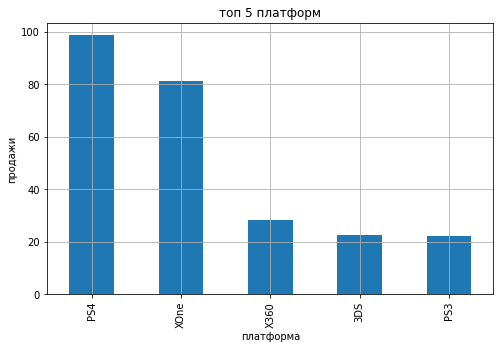

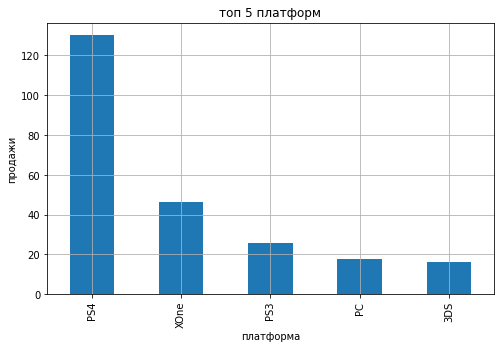

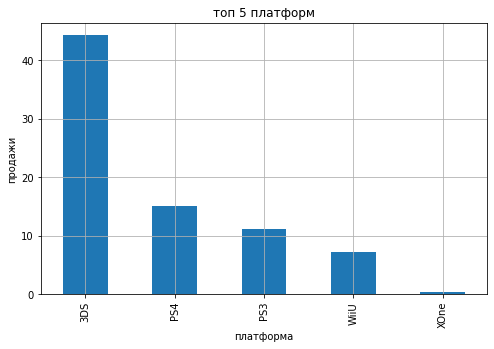

In [29]:
regions = games.columns[4:7]
for i in range(3):
    df_i = games.groupby('platform')[regions[i]].sum().reset_index().sort_values(regions[i], ascending = False).head(5)
    df_i.plot(x = 'platform', kind = 'bar', figsize=(8,5), grid = True, title = 'топ 5 платформ', legend=None)
    plt.xlabel('платформа')
    plt.ylabel('продажи')
    plt.show()

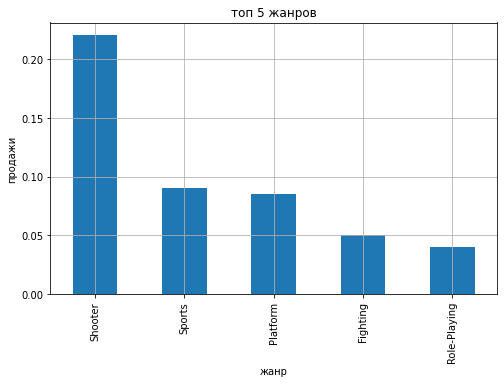

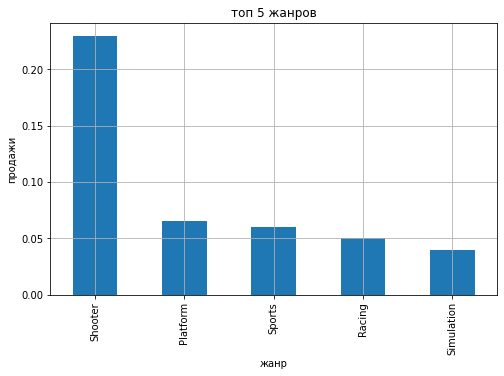

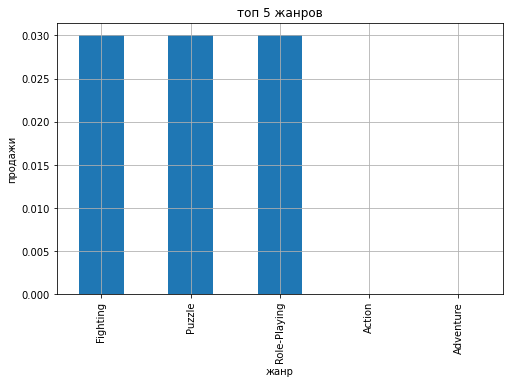

In [30]:

for i in range(3):
    df_i = games.groupby('genre')[regions[i]].median().reset_index().sort_values(regions[i], ascending = False).head(5)
    df_i.plot(x = 'genre', kind = 'bar', figsize=(8,5), grid = True, title = 'топ 5 жанров', legend=None)
    plt.xlabel('жанр')
    plt.ylabel('продажи')
    plt.show()

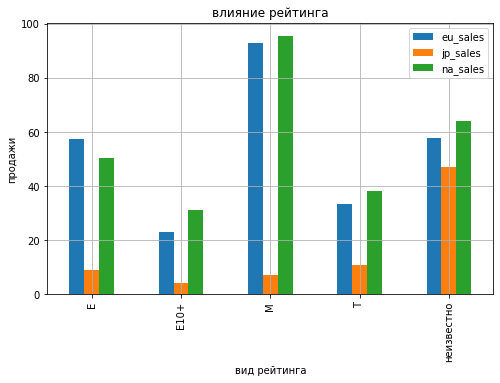

In [31]:
rating_pivot = games.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
rating_pivot.plot(kind = 'bar', figsize=(8,5), grid = True, title = 'влияние рейтинга')
plt.xlabel('вид рейтинга')
plt.ylabel('продажи')
plt.show()

Продажы по регионам:
Регион Северной Америки и Европы похожи. В них преобладают платформы PS4 и XOne, однако в Европе продажи XBox меньше и присутствует весомая доля PC пользователей. В обоих основная доля игр - шутеры. 
Япония Сильно отличается. В ней преобладают отечественные консоли. Наибольшее количество продаж у 3DS, далее по нисходящей консоли от Sony. Жанры в этом регионе предпочитают: Ролевые, Пазлы, Файтинги.
Можно сказать, что это связано с культурной особенностью. Европа и Северная-Америка близкие по этому фактору.

Данные по возрастному рейтингу в Японии нельзя точно определить, так как в большинстве их играх не был указан рейтинг. Возможно это игры с неопределенным рейтингом. RP.
В Европе и Северной - Америке предпочитают игры с рейтингом М, где присутствует насилие. Это связано с большой популярностью жанра Шутер и Экшен. В целом нельзя сказать, что возрастной рейтинг влияет на продажи, скорее определенные жанры и их популярность влияют на рынок.

## Проверка гипотез

In [32]:
games_clean= games.dropna(subset=['user_score'])
games_clean['user_score'].isna().sum()


0

In [33]:
#H_0 Средние пользовательские рейтинги платформ Xbox One и PC !=
#H_a Средние пользовательские рейтинги платформ Xbox One и PC =

platform_xbox_one = games_clean.query('platform == "XOne"')['user_score']
platform_pc = games_clean.query('platform == "PC"')['user_score']
results = st.ttest_ind(platform_xbox_one, platform_pc,equal_var=False)
alpha = 0.05
print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


In [34]:
#H_0 Средние пользовательские рейтинги жанров Action и Sports =
#H_a Средние пользовательские рейтинги жанров Action и Sports !=

user_score_action = games_clean.query('genre == "Action"')['user_score']
user_score_sports = games_clean.query('genre == "Sports"')['user_score']
results = st.ttest_ind(user_score_action, user_score_sports,equal_var=False)
alpha = 0.05
print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.3972523609104894e-13
Отвергаем нулевую гипотезу



В первой гипотезе значение p-value больше 0,5%, это значит, вероятность, что средние пользовательские рейтинги платформ Xbox One и PC неравны очень низкая, поэтому мы не можем отвергнуть нулевую гипотезу.

Во-второй гипотезе значение p-value намного меньше 0,5%, это значит, вероятность, что средние пользовательские рейтинги жанров Action и Sports равны очень низкая, поэтому мы можем отвергнуть нулевую гипотезу.

## Общий вывод

На этапе предобработки было обнаруже большое количество пропусков.
В столбцах оценка критиков и оценка пользователей, нельзя удалить или заполнить пропуски, поскольку это может исказить анализ данных. Причиной пропусков может быть, отсутствие значений. Это могут быть неизвестные, неоцененные игры или недавно вышедшие. В оценке пользователей помимо обычных пропусков, были обнаружены значения 'tbd'. Их приравляли к пропускам, поскольку это неизвестное значение. Пропуски в возрастном рейтинге, также нельзя заполнить точно, но можно заполнить их значением 'неизвестно'. Возможно это рейтинг RP, который и и означает неопределенный рейтинг в таблице ESRB.
Пропуски в столбцах с названием, годом выпуска и жанром, скорее всего связаны с тем, что у игры нет точных данных об этих характеристиках, либо разработчики забыли указать их. У нас нет данных для заполнения этих ячеек и их количество менее 2%, они не повлияют на дальнейший ход исследования, поэтому данные были удалены.

Количество выпущеных игр в разные годы заметно отличается. Наиболее продаваемые платформы за все время не помогут нам в иследовании. Необходимо выделить самые популярные платформы именно за последние года. Поскольку нам необходимо составить прогноз на следующий год, возмем данные за последние два полных года, поскольку данные за 2016 год неполные - это 2014 - 2016 года. Они покажут нам актуальную информацию по платформам и продажам. Характерный срок для появления новых платформ - несколько лет, а старые исчезают примерно за 10 лет. Это связано с быстрым ростом технологий в мире. 

За  последние два года прослеживается тенденция, что продажи расли у PS4 и XOne, у всех остальных  платформ падают продажи. Особенно сильно у приставок прошлого покаления PS3 и X360. Поэтому стоит присмотреться именно к PS4 и XOne.

Абсолютный лидер по сумме продаж платформа - PS4, далее идет Xone и 3DS. Средний результат у PS3 и X360. Pc замыкает список интересующих нас платформ. Из этого следует, что большей популярностью пользуются консоли. 


Отбросив выбросы, можем наблюдать, что самыми продаваемыми платформами являются PS4, XOne и WiiU. Выбросами в данном случае могут быть аномально успешные проекты. В нашем случае выбросы практически не влияют на общую картину данных.

Можем заметить, что у популярных платформ отсутствует влияние оценки пользователей, однако оценки критиков действительно влияют на продажи. Это не удивительно, поскольку частно люди сначала прислушиваются к мнению критиков, а после игра становится популярна среди пользователей. Но у платформ с меньшем количеством продаж картина меняется, поэтому более правильно прогназировать рекламную компанию будет, опираясь на определенную платформу.

Больше всего приносят денег такие жанры как: Шутеры, Экшен, Ролеплей и Спортивные. По средним продажам жанер Шутер, довольно близко к жанру Экшен, хоть и продаж в сумме у него заметно меньше. Самые высокие средние продажы у жанра Шутер. Наиболее часто встречается жанр - Экшен. Поэтому у него большие общие продажы, хотя среднее по продажам невысокое. Самые низкие показатели у Пазл игр и стратегий. Остальные распределены примерно одинаково.


Возможно в последнее время стали более популярны бесплатные игры с системой внутриигровой покупки, поэтому цифры по продажам упали. Либо новые проекты находятся в стадии разработки.

В рекламной компании стоит сделать ставку на продвижение игр среди критиков, так же постараться уделить внимание тем играм у которых хорошие оценки. 

Для успешной рекламной компании, будут самыми востребоваными жанры, которые приносят больше всего денег: Шутеры, Экшен, Ролеплей и Спортивные. 

Регион Северной Америки и Европы похожи. В них преобладают платформы PS4 и XOne, однако в Европе продажи XBox меньше и присутствует весомая доля PC пользователей. В обоих основная доля игр - шутеры. 
Япония Сильно отличается. В ней преобладают отечественные консоли. Наибольшее количество продаж у 3DS, далее по нисходящей консоли от Sony. Жанры в этом регионе предпочитают: Ролевые, Пазлы, Файтинги.
Можно сказать, что это связано с культурной особенностью. Европа и Северная-Америка близкие по этому фактору.
Из этого может следовать, что рекламную компанию нужно делать основываясь на регионе.

В Европе и Северной - Америке предпочитают игры с рейтингом М, где присутствует насилие. Это связано с большой популярностью жанра Шутер и Экшен. Нельзя однозначно сказать, что возрастной рейтинг влияет на продажи, скорее определенные жанры и их популярность влияют на рынок. При этом, американская система оценки возрастной категории не катируется в Японии, поэтому по этому региону мы не можем точно составить оценку.

Средние пользовательские рейтинги платформ и жанров могут отличаться, но нельзя говорить о том, что присутствует закономерность, влияющая на продажи.